# Train - test split

In this chapter, you will keep working with the ANSUR dataset. Before you can build a model on your dataset, you should first decide on which feature you want to predict. In this case, you're trying to predict gender.

You need to extract the column holding this feature from the dataset and then split the data into a training and test set. The training set will be used to train the model and the test set will be used to check its performance on unseen data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ansur_df_1_org = pd.read_csv("dataset/ANSUR_II_MALE.csv")
ansur_df_2_org = pd.read_csv("dataset/ANSUR_II_FEMALE.csv")
print(ansur_df_1_org.columns)
print(ansur_df_2_org.columns)


Index(['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting',
       'acromialheight', 'acromionradialelength', 'anklecircumference',
       'axillaheight', 'balloffootcircumference', 'balloffootlength',
       'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth',
       'chestheight', 'crotchheight', 'crotchlengthomphalion',
       'crotchlengthposterioromphalion', 'earbreadth', 'earlength',
       'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'fun

In [4]:

selected_cols = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch',"stature_m","weight_kg","footlength"]
ansur_df_1 = ansur_df_1_org[selected_cols]
ansur_df_2 = ansur_df_2_org[selected_cols]
print(ansur_df_1.columns)
print(ansur_df_2.columns)

Index(['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch',
       'stature_m', 'weight_kg', 'footlength'],
      dtype='object')
Index(['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch',
       'stature_m', 'weight_kg', 'footlength'],
      dtype='object')


In [5]:
ansur_df = pd.concat([ansur_df_1,ansur_df_2],axis=0,ignore_index=True)
ansur_df.head()

,BMI_class,Height_class,Gender,Component,Branch,stature_m,weight_kg,footlength
0,Overweight,Tall,Male,Regular Army,Combat Arms,1.776,81.5,273
1,Overweight,Normal,Male,Regular Army,Combat Support,1.702,72.6,263
2,Overweight,Normal,Male,Regular Army,Combat Support,1.735,92.9,270
3,Overweight,Normal,Male,Regular Army,Combat Service Support,1.655,79.4,267
4,Overweight,Tall,Male,Regular Army,Combat Service Support,1.914,94.6,305


In [6]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop(['Gender','BMI_class',	'Height_class'	,'Component',	'Branch'], axis = 1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"{X_test.shape[0]} rows in test set vs. {X_train.shape[0]} in training set, {X_test.shape[1]} Features.")

1821 rows in test set vs. 4247 in training set, 3 Features.


# Fitting and testing the model

 You'll now create a support vector machine classifier model (`SVC()`) and fit that to the training data. You'll then calculate the accuracy on both the test and training set to detect overfitting.

In [7]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

85.9% accuracy on test set vs. 85.5% on training set


# Accuracy after dimensionality reduction

You'll reduce the overfit with the help of dimensionality reduction. In this case, you'll apply a rather drastic form of dimensionality reduction by only selecting a single column that has some good information to distinguish between genders. You'll repeat the train-test split, model fit and prediction steps to compare the accuracy on test versus training data.

In [8]:
# Assign just the 'footlength' column from ansur_df to X
X = ansur_df[['footlength']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

85.3% accuracy on test set vs. 84.9% on training set


# Finding a good variance threshold

You'll be working on a slightly modified subsample of the ANSUR dataset with just head measurements pre-loaded as `head_df`.

In [9]:
selected_cols = ['headbreadth', 'headcircumference', 'headlength']

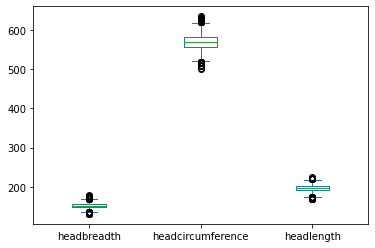

In [10]:
head_df = pd.concat([ansur_df_1_org[selected_cols], ansur_df_2_org[selected_cols]], axis=0, ignore_index=True)
# Create the boxplot
head_df.plot.box()

plt.show()

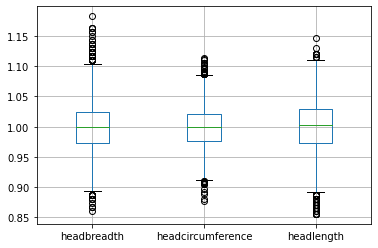

In [11]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

In [12]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          0.001679
headcircumference    0.001030
headlength           0.001868
dtype: float64


# Features with low variance

In the previous exercise you established that 0.001 is a good threshold to filter out low variance features in `head_df` after normalization. Now use the `VarianceThreshold` feature selector to remove these features.

In [13]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced DataFrame
reduced_df = head_df.loc[:, mask]

print(f"Dimensionality reduced from {head_df.shape[1]} to {reduced_df.shape[1]}.")

Dimensionality reduced from 3 to 3.


# Removing features with many missing values

You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as `school_df`. Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.

In [14]:
school_df = pd.read_csv("dataset/Public_Schools2.csv")
school_df.columns

Index(['x', 'y', 'objectid_1', 'objectid', 'bldg_id', 'bldg_name', 'address',
       'city', 'zipcode', 'csp_sch_id', 'sch_id', 'sch_name', 'sch_label',
       'sch_type', 'shared', 'complex', 'label', 'tlt', 'pl', 'point_x',
       'point_y'],
      dtype='object')

In [15]:
school_df.isna().sum()/len(school_df)

x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.877863
complex       0.984733
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64

In [16]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:,mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


# Correlation intuition

What statement on correlations is correct?

- The correlation coefficient of A to B is equal to that of B to A.

# Inspecting the correlation matrix

A sample of the ANSUR body measurements dataset has been pre-loaded as `school_df`. Use the terminal to create a correlation matrix for this dataset.

In [17]:
school_df.corr()

,x,y,objectid_1,objectid,bldg_id,zipcode,csp_sch_id,sch_id,label,tlt,point_x,point_y
x,1.000000,0.473364,-0.510227,-0.007908,-0.278011,-0.281229,0.082078,0.082078,-0.031629,-0.205847,0.999985,0.476233
y,0.473364,1.000000,-0.329981,0.126231,-0.235797,-0.029144,-0.045393,-0.045393,-0.085786,0.156413,0.468584,0.999993
objectid_1,-0.510227,-0.329981,1.000000,0.415062,0.447980,0.191296,-0.078681,-0.078681,-0.245372,0.152767,-0.509573,-0.331199
objectid,-0.007908,0.126231,0.415062,1.000000,0.141916,-0.059306,-0.145790,-0.145790,-0.254616,0.102482,-0.008674,0.125981
bldg_id,-0.278011,-0.235797,0.447980,0.141916,1.000000,0.082355,0.049492,0.049492,0.000062,-0.045506,-0.277419,-0.236490
zipcode,-0.281229,-0.029144,0.191296,-0.059306,0.082355,1.000000,-0.097984,-0.097984,0.065360,0.100271,-0.281904,-0.029995
csp_sch_id,0.082078,-0.045393,-0.078681,-0.145790,0.049492,-0.097984,1.000000,1.000000,0.160027,-0.599612,0.082465,-0.045252
sch_id,0.082078,-0.045393,-0.078681,-0.145790,0.049492,-0.097984,1.000000,1.000000,0.160027,-0.599612,0.082465,-0.045252
label,-0.031629,-0.085786,-0.245372,-0.254616,0.000062,0.065360,0.160027,0.160027,1.000000,-0.139426,-0.031164,-0.085621
tlt,-0.205847,0.156413,0.152767,0.102482,-0.045506,0.100271,-0.599612,-0.599612,-0.139426,1.000000,-0.207291,0.155647


# Visualizing the correlation matrix

Correlation in its raw, numeric format doesn't allow us to get a quick overview. Let's improve this by removing redundant values and visualizing the matrix using seaborn.

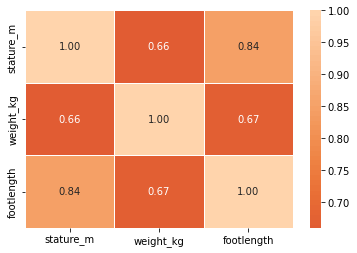

In [18]:
# Create the correlation matrix
corr = ansur_df.corr()

# Draw a heatmap of the correlation matrix
sns.heatmap(corr, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [19]:
import numpy as np
# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

print(mask)

[[ True  True  True]
 [False  True  True]
 [False False  True]]


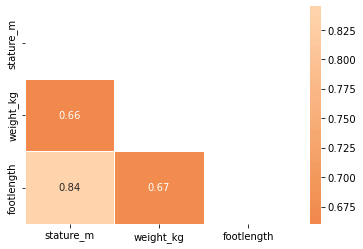

In [21]:
# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# Filtering out highly correlated features

You're going to automate the removal of highly correlated features in the numeric dataset. You'll calculate the correlation matrix and filter out columns that have a correlation coefficient of more than 0.95 or less than -0.95.

Since each correlation coefficient occurs twice in the matrix (correlation of A to B equals correlation of B to A) you'll want to ignore half of the correlation matrix so that only one of the two correlated features is removed. Use a mask trick for this purpose.

In [24]:
# Calculate the correlation matrix and take the absolute value
corr_df = school_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = school_df.drop(to_drop, axis=1)

print(f"The reduced_df DataFrame has {reduced_df.shape[1]} columns.")

The reduced_df DataFrame has 18 columns.


# Nuclear energy and pool drownings

The dataset that has been pre-loaded for you as `weird_df` contains actual data provided by the US Centers for Disease Control & Prevention and Department of Energy.

Let's see if we can find a pattern.

In [25]:
# weird_df = pd.read_csv("dataset/grocery_sales.csv")
# weird_df.head()

In [26]:
# # Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
# sns.scatterplot(x="nuclear_energy", y="pool_drownings", data=weird_df)
# plt.show()

In [27]:
# # Print out the correlation matrix of weird_df
# print(weird_df.corr())

- What does this mean : Not much, correlation does not imply causation.